In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def conduccion_1d(L, K, S, Ta, Tb, N):
    """
    Parameters
    -----
    
    L: float
    L es la longitud del dominio.
    
    K: float
    K es la conductividad.
    
    S: float
    S es la fuente.
    
    Ta: float
    Ta es la condición de frontera a la izquierda.
    
    Tb: float
    Tb es la condición de frontera a la derecha.
    
    N: int
    N es el número de nodos internos (grados de libertad).
    
    Return
    ------
    Al final esta función dibuja la solución.
    """

    h = L/(N+1)
    r = K/h**2

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros ((N,N))

    b[:] = S/r
    T[0] = Ta
    T[-1] = Tb
    b[0] += Ta
    b[-1] += Tb

    for i in range (0,N):
        A[i,i] = 2
        for j in range (0, N-1):
            A[j,j+1] = -1
            A[j+1,j] = -1

    T[1:N+1] = np.linalg.solve(A,b)
    plt.plot(T, 'o-')

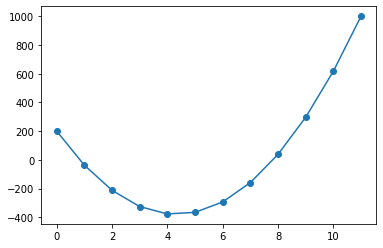

In [3]:
conduccion_1d(5.0, 0.02, -6, 200, 1000, 10)

In [4]:
import ipywidgets as widgets

In [9]:
w = widgets.interactive(conduccion_1d,
                       L = widgets.fixed(5.0),
                        K = widgets.fixed(0.02),
                        S = widgets.FloatSlider(max = 10.0, min = -10.0, value = 0, step=0.2),
                        Ta = widgets.fixed(200),
                        Tb = widgets.fixed(1000),
                        N = widgets.IntSlider(max = 100, min = 1, value = 5))

In [10]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='S', max=10.0, min=-10.0, step=0.2), IntSlider(value=…